# **Métricas de Desempeño**
---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## Datos
---

Este punto debe solucionarse a partir del siguiente conjunto de datos:

In [ ]:
data = pd.read_parquet("https://drive.google.com/uc?export=view&id=1VGFo8Ds6PmXegNtifdpk8-7_dNOb7Mur")
x, y = data.x.values, data.y.values

Text(0, 0.5, '$y$')

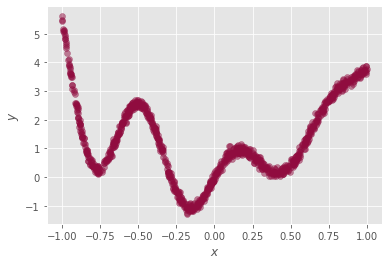

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, label="datos", color = "#900C3F")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

## Parte 1
---

Implemente un modelo de regresión lineal sobre los datos usando `numpy` (sin usar `sklearn`):

Para definir w se toma la definición algebraica que es:
$$  \mathbf{w} = (\mathbf{X} ^ T \mathbf{X}) ^ {-1} \mathbf{X} ^ T \mathbf{y}
$$

In [ ]:
#antes de definir w, necesitamos redimensional x para la multiplicación matricial
x2 = x.reshape(-1,1)

In [ ]:
# Su código aquí
w = np.linalg.inv(x2.T @ x2) @ x2.T @ y
w

array([0.1450374])

## Parte 2
---

Utilizando el vector `x_test`, genere un vector de predicciones `y_pred`:

Para definir y_pred o y gorrito es necesario tener en cuenta su definición algebraica:
$$
\tilde{\mathbf{y}} = \mathbf{X} \cdot \mathbf{w}
$$

In [ ]:
#Se tuvo que redimensionar x_test para calcular y_pred
x_test = np.linspace(-1, 1, 100).reshape(-1,1)
# Su código aquí
y_pred = x_test @ w

Utilice la siguiente celda para revisar el resultado:

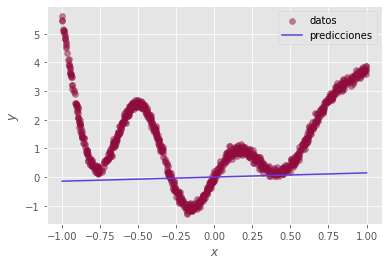

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, label="datos", color = "#900C3F")
ax.plot(x_test, y_pred, label="predicciones", color = "#633BDA")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

## Parte 3
---

Según lo observado, el modelo de regresión lineal es apropiado para los datos?

**Discuta los resultados**

La regresión lineal como definición es básicamente una técnica de análisis de datos que predice el valor de los datos que no conocemos, esto se realiza mediante el uso de otro valor de datos relacionado y conocido, en nuestra grafica podemos observar que la regresión lineal no es acorde con los datos, ya que la curva de la regresión no coordina con la línea de los datos, por ello podemos concluir que este modelo no es apropiado para los datos.

## Parte 4
---

Genere una matriz de características a partir de los datos `x`. Por ejemplo:

$$
\mathbf{x_i} = [x ^ 0, x ^ 1, x ^ 2, x ^ 3]
$$

In [ ]:
# EXEMPLO
X = np.vander(x, 4)
print(X[0])
print([x[0] ** i for i in range(4)][::-1])

[0.39760127 0.54071096 0.73533051 1.        ]
[0.3976012667615668, 0.540710960354759, 0.7353305109641235, 1.0]


Puede usar cualquier función aritmética/geométrica para transformar los datos, lo importante es que resulte como una matriz de $(N, m)$ (muestras por características).

In [ ]:
def transform(x):
    # X = np.vander(x, 4)
    potencias = [x, x**2,x**3,x**4,x**5]
    X = np.column_stack(potencias)
    # Su código aquí
    return X

## Parte 5
---

Entrene un modelo de regresión lineal con los datos transformados, seleccione unas transformaciones que den la mejor aproximación a los datos.

In [ ]:
X = transform(x)
# Su código aquí

#Para seleccionar las transformaciones que den la mejor aproximación
def mse(y_true, y_test):
    return ((y_true - y_test) ** 2).sum()

def mc_linear_regression(x, y, n_iters):
    w = np.random.normal(size=(X.shape[1], 1))
    for i in range(n_iters):
        w2 = w + np.random.normal(size=(X.shape[1], 1))
        y_pred = x @ w
        y_pred2 = x @ w2
        if mse(y, y_pred2) < mse(y, y_pred):
            w = w2
    return w


In [ ]:
w = mc_linear_regression( X , y, 100)
print("Las transformaciones que dan la mejor aproximación son: ", w)

Las transformaciones que dan la mejor aproximación son:  [[-0.31159976]
 [ 3.2487856 ]
 [ 1.1074391 ]
 [-1.73597426]
 [-0.550447  ]]


## Parte 6
---

Genere predicciones a partir del vector `x_test`:

In [ ]:
x_test = np.linspace(-1, 1, 100).reshape(-1,1)
X_test = transform(x_test)
# Su código aquí
y_pred = X_test @ w

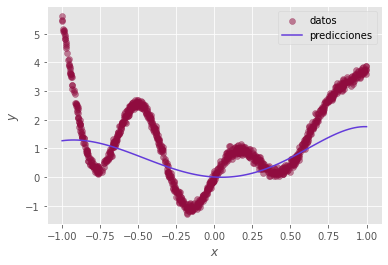

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, label="datos", color = "#900C3F")
ax.plot(x_test, y_pred, label="predicciones", color = "#633BDA")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

## Parte 7
---

Revise el modelo [Ridge Regression](https://en.wikipedia.org/wiki/Ridge_regression#:~:text=Ridge%20regression%20is%20a%20method,econometrics%2C%20chemistry%2C%20and%20engineering.):

Encuentre la solución analítica de ridge regression usando álgebra lineal (muestre y explique el paso a paso de la deducción).

En la Regresión de Ridge, se busca minimiizar la suma de cuadrados de estimación de errores, multiplicando a beta por el coeficiente de penalización lambda o k como se conoce en el siguiente punto, es decir que como punto de partida tenemos esto:
$$
 RSS + \lambda \beta ^T \beta
$$

Se reemplaza el valor de RSS
$$
(y-X\beta)^T (y-X\beta) + \lambda \beta^T\beta
$$

Se hace la transpuesta del primer parentesis y se multiplica con el segundo parentesis, simplicaficando expresiones y da lo siguiente:

$$
(y^T - \beta^TX^T) (y-X\beta) + \lambda \beta^T\beta
$$

$$
y^Ty - 2\beta^T X^T y + \beta^TX^TX\beta + \lambda\beta^T\beta
$$

Luego se deriva con respecto a beta

$$\\
\frac{\partial y^Ty - 2\beta^T X^T y + \beta^TX^TX\beta + \lambda\beta^T\beta }{\partial\beta}\\
$$

El primer termino a derivar da 0 y de resto se siguen las reglas de derivación:

$$
-2X^Ty + 2X^TX\beta + 2\lambda\beta\\
$$

Es necesario recordar que se busca minimizar, para ello el siguiente paso es igualar a 0 la derivada obtenida y empezar a operar, simplificar y obtener el valor de beta:

$$
0 = -2X^Ty + 2X^TX\beta + 2\lambda\beta\\
$$

Primero se saca factor comun de 2 y se puede eliminar facilmente, dando la siguiente expresión:

$$
0 = -X^Ty + X^TX\beta + \lambda\beta\\
$$

Se pasan los negativos al lado izquierdo:

$$
X^Ty = X^TX\beta + \lambda\beta\\
$$

Ahora del lado derecho se saca factor comun de beta

$$
X^Ty = (X^TX + \lambda)\beta
$$

En el anterior paso para poder sacar beta se agrega una matriz de identidad como equivalente.

Y finalmente se pasa el parentesis que multiplica el lado derecho a beta al lado izquierdo como termino inverso, formula que se usará mas adelante como w:

$$
(X^TX +\lambda I)^{-1} X^Ty = \beta
$$

## Parte 8
---

Implemente la solución analítica de Ridge Regression:

## Parte 9
---

Genere predicciones a partir del vector `x_test`:

Los puntos 8 y 9 se presentan a continuación

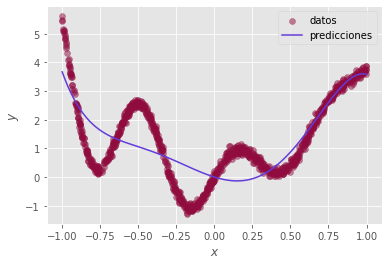

In [ ]:
# Función de transformación de características
def transform(x):
    potencias = [x, x**2,x**3,x**4,x**5]
    X = np.column_stack(potencias)
    return X

# Datos de entrenamiento
data = pd.read_parquet("https://drive.google.com/uc?export=view&id=1VGFo8Ds6PmXegNtifdpk8-7_dNOb7Mur")
x, y = data.x.values, data.y.values

# Matriz de diseño
X = transform(x)

# Ajuste del modelo con Ridge Regression
lambd = 0.1  # el parámetro lambda controla la fuerza de regularización
I = np.identity(X.shape[1])
w = np.linalg.inv(X.T @ X + lambd * I) @ X.T @ y

# Conjunto de prueba
x_test = np.linspace(-1, 1, 100)
X_test = transform(x_test)

# Predicciones
y_pred = X_test @ w

# Gráfico de los datos de entrenamiento y las predicciones
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, label="datos", color = "#900C3F")
ax.plot(x_test, y_pred, label="predicciones", color = "#633BDA")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

plt.show()


## Parte 10
---

Cambie el hiperparámetro de regularización `k` de ridge regression. Responda las siguientes preguntas:

1. Qué efecto tiene ese hiperparámetro sobre las predicciones?
2. Qué efecto tiene ese hiperparámetro sobre los parámetros del modelo $w$?
3. Por qué se usa este hiperparámetro?
4. Qué es regularización en los modelos de machine learning?

##Solución

1. El hiperparámetro lambda en la Ridge Regression controla la fuerza de la regularización, lo que afecta a las predicciones del modelo. Un valor más alto de lambda producirá una mayor regularización, lo que significa que los coeficientes de las características se reducirán más, reduciendo el overfitting del modelo. Como resultado, las predicciones del modelo serán más suaves y estables, pero pueden ser menos precisas en algunos casos.

2. El hiperparámetro lambda en la Ridge Regression tiene un efecto en los parámetros del modelo $w$. A medida que aumenta lambda, los valores de los coeficientes se reducen más, lo que significa que el modelo se vuelve más simple y menos propenso al overfitting.

3. El hiperparámetro lambda se utiliza en la Ridge Regression para controlar la fuerza de la regularización. La regularización se utiliza para reducir el overfitting en los modelos de machine learning, lo que significa que el modelo se ajusta demasiado bien a los datos de entrenamiento y no se generaliza bien a los nuevos datos. La Ridge Regression es un método de regularización que se utiliza para reducir el overfitting al restringir los valores de los coeficientes.

4. La regularización en los modelos de machine learning es una técnica que se utiliza para evitar el overfitting y mejorar la capacidad de generalización del modelo. La regularización restringe los valores de los coeficientes de las características para evitar que el modelo se ajuste demasiado bien a los datos de entrenamiento y no se generalice bien a los nuevos datos. La Ridge Regression es un método de regularización que restringe los valores de los coeficientes de las características mediante la adición de un término de regularización a la función de costo del modelo.